.HABERMAN SURVIVAL DATA SET

.Relevant Information: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of     
 Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

.Number of Instances: 306

.Attribute Information:

1.) Age of patient at time of operation (numerical)
2.) Patient's year of operation (year - 1900, numerical)
3.) Number of positive axillary nodes detected (numerical)
4.) Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

.Objective: we can predict, whether the patients can survive more than 5 years or not. 


In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore") 
%matplotlib inline

#Loading haberman data set in pandas data frame

haberman = pd.read_csv("haberman.csv")


In [2]:
#Number of features

print('This dataset has ' + str(haberman.shape[0]) + ' rows, and ' + str(haberman.shape[1]) + ' columns')

This dataset has 306 rows, and 4 columns


In [3]:
#Columns name in our data set

print (haberman.columns)

Index(['Age', 'Op_Year', 'axil_nodes', 'Surv_status'], dtype='object')


In [4]:
#Classification of patients who survived more than 5 years as 1 and died within 5 years

haberman['Surv_status'].value_counts()

1    225
2     81
Name: Surv_status, dtype: int64

Conclusion: We got 225 patients who survived for more than 5 years and 81 patients who died within 5 years.
          : This is example of imbalanced data set. 

# Bi-Variate Analysis

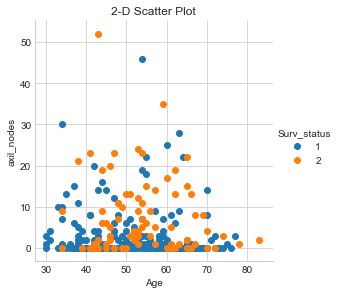

In [51]:
# 2-D Scatter plot with color-coding for each flower type/class.

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Surv_status", size=4) \
   .map(plt.scatter, "Age", "axil_nodes") \
   .add_legend();
plt.title('2-D Scatter Plot')
plt.show();

Conclusion: 1.) Higher the positive axillary lymph nodes lesser the chance of survival.
            2.) Between age 50 to 60 patients have less number of positive auxilary lymph nodes and hence survial rate     
            increases. 

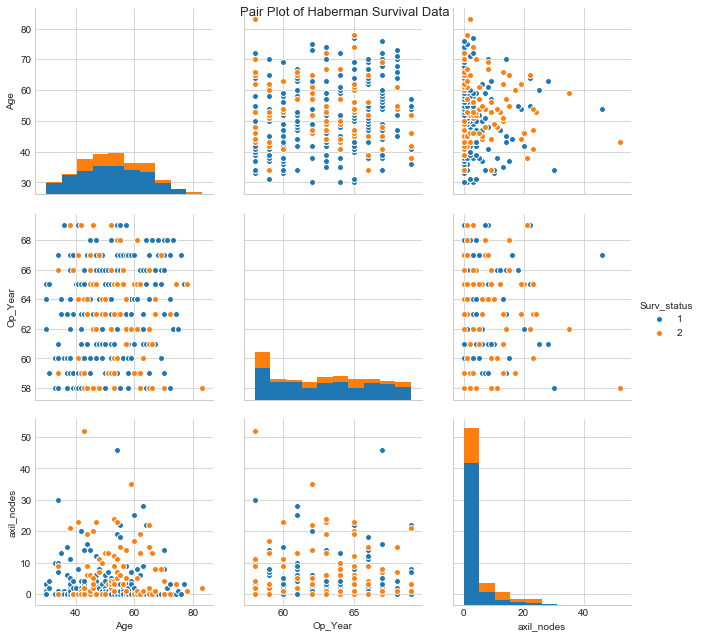

In [50]:
# Pair-Plot
sns.set_style('whitegrid');
sns.pairplot(haberman, hue='Surv_status', size=3, vars=['Age', 'Op_Year', 'axil_nodes'])
plt.suptitle('Pair Plot of Haberman Survival Data', 
             size = 13);
plt.show()

NUMBERING OF PLOTS IS COLUMN WISE

Conclusion: 1.) Plot 1, Plot 5 and Plot 9 are the histograms of all combinations of features which explains the density of data by considering different features of data.
2.) In plot 2 we can see that Operation year on Y-axis and Age on X-axis, now in ihis plot there are overlapping of points so we can't get much out of this plot.
3.) In plot 3 with Auxilary nodes on Y-axis and and Age on X-axis, we can see some overlapping but it is better than plot 2 in short more distinguishable.
4.) In plot 4 with Age on Y-axis and Operation year on X-axis is just mirror image of plot 2.
5.) In plot 6 with auxilary nodes on Y-axis and Operation year on X-axis so there are overlapping we can reject this plot.
6.) In plot 7 with Age on Y-axis and Auxilary nodes on X-axis, it is mirror image of plot 3.
7.) Plot 8 is mirror image of plot 6.
8.) So from overall pair plot analysis we can consider two features which are Auxilary nodes and Age.

# Univariate Analysis

In [26]:
haberman.head(7)

,Age,Op_Year,axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1


As we can see that clearly Age, Axil_nodes and Surv_status are continuous variable category.

In [17]:
# Statistics of our data set
haberman.describe()

,Age,Op_Year,axil_nodes,Surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Conclusion: 1.) Minimum age is 30 and Maximum age is 83 with an average age of 52 and deviation is 10.
             2.) 75% people have less than 4 auxilary nodes and 25% people have 0 nodes.

In [12]:
# Separating Target variable in categories
haberman_Long_Survive = haberman.loc[haberman['Surv_status'] == 1];
haberman_Short_Survive = haberman.loc[haberman['Surv_status'] == 2];


# Distribution Plot

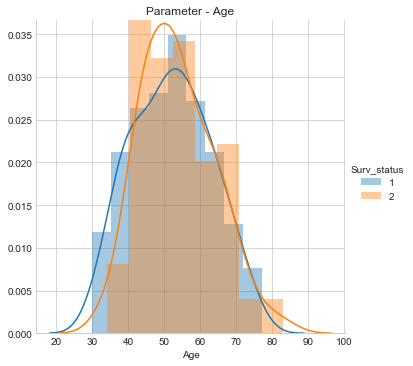

In [25]:
sns.FacetGrid(haberman, hue="Surv_status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.title("Parameter - Age")
plt.show();

Conclusion: Between age 50 to 60, We got maximum surviaval rate as well as death rate.

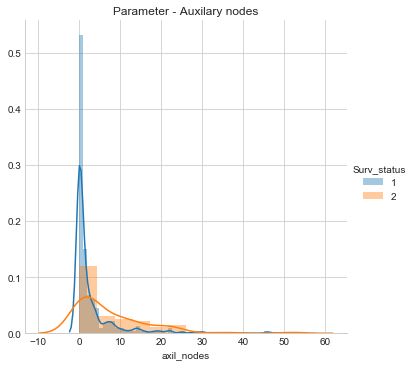

In [31]:
sns.FacetGrid(haberman, hue="Surv_status", size=5) \
   .map(sns.distplot, "axil_nodes") \
   .add_legend();
plt.title("Parameter - Auxilary nodes")
plt.show();

Conclusion: When patient have zero positive auxilary lymph node they suvived longer and hence survival status curve is at its max.

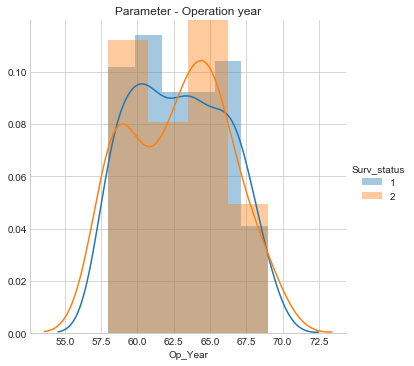

In [32]:
sns.FacetGrid(haberman, hue="Surv_status", size=5) \
   .map(sns.distplot, "Op_Year") \
   .add_legend();
plt.title("Parameter - Operation year")
plt.show();

Conclusion: Between 1958 and 1962 most of the patients survived.

# PDF And CDF

pdf= [ 0.05228758  0.08823529  0.1503268   0.17320261  0.17973856  0.13398693
  0.13398693  0.05882353  0.02287582  0.00653595]
bin_edges= [ 30.   35.3  40.6  45.9  51.2  56.5  61.8  67.1  72.4  77.7  83. ]
cdf= [ 0.05228758  0.14052288  0.29084967  0.46405229  0.64379085  0.77777778
  0.91176471  0.97058824  0.99346405  1.        ]


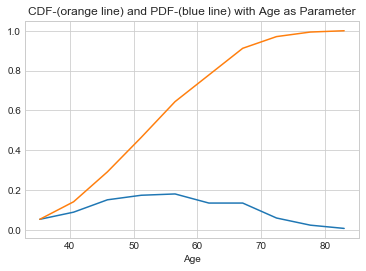

In [54]:
#cdf and pdf with Age as parameter
counts, bin_edges = np.histogram(haberman['Age'], bins = 10,
                                 density = True )
plt.title("CDF-(orange line) and PDF-(blue line) with Age as Parameter")
plt.xlabel('Age')
pdf = counts/(sum(counts))
print("pdf=", pdf);
print("bin_edges=", bin_edges);
cdf = np.cumsum(pdf)
print("cdf=", cdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

Conclusion: There are approximately 92% patients whose age lies between 30 to 70. 

[ 0.83555556  0.08        0.02222222  0.02666667  0.01777778  0.00444444
  0.00888889  0.          0.          0.00444444]
[  0.    4.6   9.2  13.8  18.4  23.   27.6  32.2  36.8  41.4  46. ]


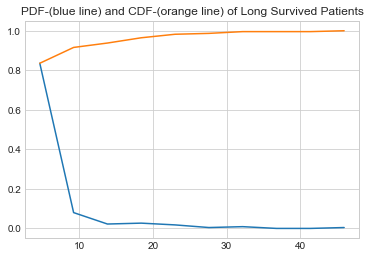

In [55]:
#cdf and pdf with auxilary nodes as parameter for Long surviving patients
counts, bin_edges = np.histogram(haberman_Long_Survive['axil_nodes'], bins=10, 
 density = True)
plt.title("PDF-(blue line) and CDF-(orange line) of Long Survived Patients")
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

Conclusion: Orange line shows there is a 82% chance of long survival of patients if number of axillary nodes detected are less than 4.And survival rate of patients decreases as detected axil nodes increases as we can see that 100% of patients didn't survived when detected axil nodes greater than 40. 

[ 0.56790123  0.14814815  0.13580247  0.04938272  0.07407407  0.
  0.01234568  0.          0.          0.01234568]
[  0.    5.2  10.4  15.6  20.8  26.   31.2  36.4  41.6  46.8  52. ]


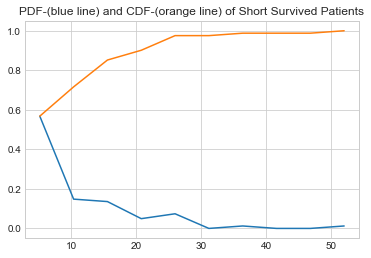

In [56]:
#cdf and pdf with auxilary nodes as parameter for Short surviving patients
counts, bin_edges = np.histogram(haberman_Short_Survive['axil_nodes'], bins=10, 
                                 density = True)
plt.title("PDF-(blue line) and CDF-(orange line) of Short Survived Patients")
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.show();

Conclusion: Short survival approximately 55% of people who have nodes less than 4 and there are nearly 100% of patients in short survival if nodes are > 40. It's conclusion is almost same as we did for long survival.

# Median, Quantiles And Percentiles

In [33]:
#Median, Quantiles, Percentiles, IQR.
print('Medians:')
print(np.median(haberman_Long_Survive['axil_nodes']))
print(np.median(np.append(haberman_Long_Survive['axil_nodes'],50)))
print(np.median(haberman_Short_Survive['axil_nodes']))
print('\nQuantiles:')
print(np.percentile(haberman_Long_Survive['axil_nodes'],np.arange(0,100,25)))
print(np.percentile(haberman_Short_Survive['axil_nodes'],np.arange(0,100,25)))
print('\n90th percentile:')
print(np.percentile(haberman_Long_Survive['axil_nodes'],90))
print(np.percentile(haberman_Short_Survive['axil_nodes'],90))
from statsmodels import robust
print ('\nMedian Absolute Deviation')
print(robust.mad(haberman_Long_Survive['axil_nodes']))
print(robust.mad(haberman_Short_Survive['axil_nodes']))

Medians:
0.0
0.0
4.0

Quantiles:
[ 0.  0.  0.  3.]
[  0.   1.   4.  11.]

90th percentile:
8.0
20.0

Median Absolute Deviation
0.0
5.93040887402


Conclusion: 1.) Average number of auxilary nodes is zero for long survival and average number of nodes is 4 for short survival. 2.) Quantiles shows that nearly 50th% of axillary lymph nodes are 0 in long survival and 75th% of patients have nodes less than 3 that is 25% patients are having nodes more than 3.Similarly, In short survival 75th% of patients have minimum 11 nodes detected. 
3.) At 90th% more than 8 nodes detected for long survival and more than 20 nodes for short survival.

# Box-Plot And Whiskers

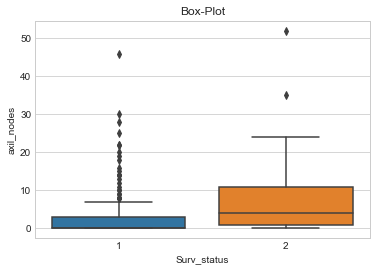

In [39]:
sns.boxplot(x='Surv_status',y='axil_nodes', data=haberman)
plt.title("Box-Plot")
plt.show()

Conclusion: 1.) Now as we can observe 25th% and 50th% are same and 75th% is nearly equal to 3. Whereas max whisker id around 7 in case of long survival. We can also st threshold at 12 after that every patient has short survival.
2.) Now 75th% for short survival is nearly equal to 12.

# Voilen plots

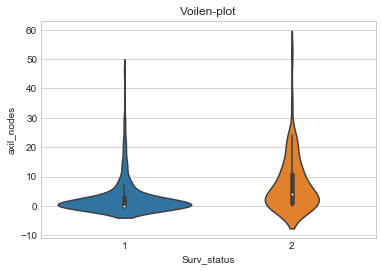

In [40]:
sns.violinplot(x="Surv_status", y="axil_nodes", data=haberman, size=8)
plt.title("Voilen-plot")
plt.show()

Conclusion: In violin plot we observe that For long survive density for it is more near the 0 nodes and also it has whiskers in range o-7 and in violin 2 it shows the short survival density more from 0–20.

So we can conclude from this haberman survival data set that patients having lesser number of positive auxilary lymph nodes have higher chance of survival, we might find some errors for few cases but in the end lesser the number of nodes longer is the survival.

Refrences: 1.) https://medium.com/@gokulkarthikk/habermans-cancer-survival-visual-exploratory-data-analysis-using-python-e7dcb7ac01ed
2.) https://www.breastcancer.org/